In [1]:
%reset -f
import pandas as pd 
from category_encoders.target_encoder import TargetEncoder

df = pd.DataFrame({
    "X1": ['A','B','A','A','B'], 
    "X2": ['a', 'b', 'c','b', 'c'],
    "Y": [1,1,0,0,1]             })

feat_col = ['X1','X2']
df_x = df[feat_col]
df_y = pd.DataFrame(df['Y'])

# Section 1

Notice X2=a only have one sample, same as min_samples_leaf,so the target value of TE(x2=a) is convergence to P(Y)=0.6

In [2]:
target_enc = TargetEncoder(cols = feat_col,return_df=True, min_samples_leaf=1, smoothing=1).fit(df_x, df_y)
df_x_transform = target_enc.transform(df_x)
print(pd.concat([df_x, df_x_transform], axis=1))

   X1  X2        X1        X2
0   A   a  0.365121  0.600000
1   B   b  0.892423  0.526894
2   A   c  0.365121  0.526894
3   A   b  0.365121  0.526894
4   B   c  0.892423  0.526894


# Section 2 : The more min_samples_leaf > smoothing, the less weight conditional probability get. 

Feature's affection shouldn't be considered independently 

In [3]:
target_enc = TargetEncoder(cols = feat_col,return_df=True, min_samples_leaf=10, smoothing=1).fit(df_x, df_y)
df_x_transform = target_enc.transform(df_x)
print(pd.concat([df_x, df_x_transform], axis=1))

#Features of b, c in X2 is more close to the classical probability~0.6
#from 0.526894 to 0.599966

   X1  X2        X1        X2
0   A   a  0.599757  0.600000
1   B   b  0.600134  0.599966
2   A   c  0.599757  0.599966
3   A   b  0.599757  0.599966
4   B   c  0.600134  0.599966


Althought it's a great method to encode category label into numeric with probability concept, 
sometimes it will conclude time ingredient let you make leakage mistake...

So please deal time ingredient (Rolling Window mode,K-Fold Target Encoding etc.) before use it!

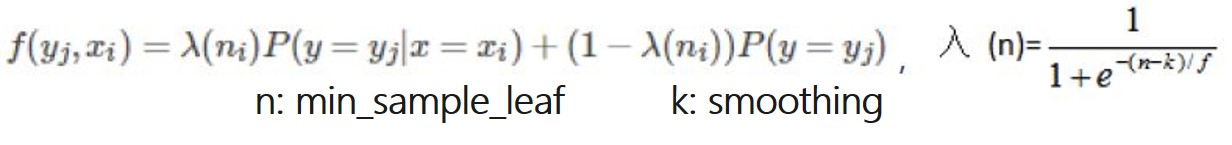

In [4]:
from IPython.display import Image
Image("TargetEncodeFormula.jpg")